<a href="https://colab.research.google.com/github/gm3g11/Gromov-Wasserstein-distance-on-Reeb-graphs/blob/main/Prpposed_Gromov_Wasserstein_distance_between_two_Reeb_graphs_with_Persistent_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install realative python packages

In [2]:
!pip install cereeberus
!pip install networkx gudhi
!pip install POT
!pip install persim
!pip install ripser
!pip install --upgrade scikit-tda




## Display two Reeb graphs

Drawing location for f1: (0, 24)
Drawing location for f2: (np.float64(-0.11461654100863508), 18)
Drawing location for f3: (0.1, 20)
Drawing location for f4: (-0.25, 12)
Drawing location for f5: (0.05, 15)
Drawing location for f6: (-0.3, 6)
Drawing location for f7: (np.float64(-0.09876592675075545), 8)
Drawing location for f8: (np.float64(-0.13701662516994437), 2)


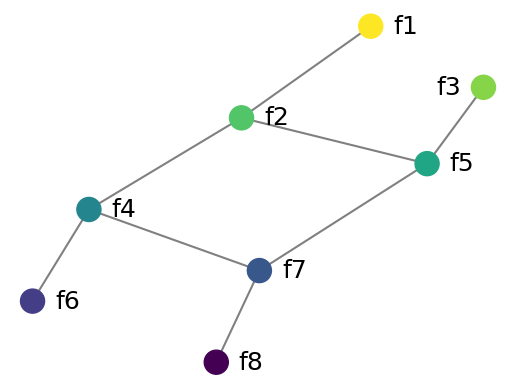

In [3]:
import cereeberus
import networkx as nx
import matplotlib.pyplot as plt
F = cereeberus.ReebGraph()


F.add_node('f1', f_vertex=24)
F.add_node('f2', f_vertex=18)
F.add_node('f3', f_vertex=20)
F.add_node('f4', f_vertex=12)
F.add_node('f5', f_vertex=15)
F.add_node('f6', f_vertex=6)
F.add_node('f7', f_vertex=8)
F.add_node('f8', f_vertex=2)

F.add_edge('f1', 'f2')
F.add_edge('f2', 'f4')
F.add_edge('f2', 'f5')
F.add_edge('f3', 'f5')
F.add_edge('f5', 'f7')
F.add_edge('f4', 'f6')
F.add_edge('f4', 'f7')
F.add_edge('f7', 'f8')

F.set_pos_from_f(seed = 3)
F.pos_f['f1'] = (0,F.f['f1'])
F.pos_f['f6'] = (-0.3,F.f['f6'])
F.pos_f['f3'] = (0.1,F.f['f3'])
F.pos_f['f5'] = (0.05,F.f['f5'])
F.pos_f['f4'] = (-0.25,F.f['f4'])


# Define custom colors for nodes and edges
node_color = 'skyblue'  # Color for nodes
edge_color = 'gray'     # Color for edges

# Draw the Reeb graph with custom colors
F.draw(cpx=8,with_labels=False)

print(f'Drawing location for f1: {F.pos_f["f1"]}')
print(f'Drawing location for f2: {F.pos_f["f2"]}')
print(f'Drawing location for f3: {F.pos_f["f3"]}')
print(f'Drawing location for f4: {F.pos_f["f4"]}')
print(f'Drawing location for f5: {F.pos_f["f5"]}')
print(f'Drawing location for f6: {F.pos_f["f6"]}')
print(f'Drawing location for f7: {F.pos_f["f7"]}')
print(f'Drawing location for f8: {F.pos_f["f8"]}')


# Manually add labels at desired positions
label_positions = {
    'f1': (0, F.f['f1']),
    'f2': (-0.1146, F.f['f2']),
    'f3': (0.1, F.f['f3']),
    'f4': (-0.25, F.f['f4']),
    'f5': (0.05, F.f['f5']),
    'f6': (-0.3, F.f['f6']),
    'f7': (-0.0988, F.f['f7']),
    'f8': (-0.1370, F.f['f8']),
}

# Add labels to the plot
for node, (x, y) in label_positions.items():
    if node == 'f3':
        plt.text(
            x - 0.02, y, node,  # Position label to the left of 'f3'
            fontsize=18,
            ha='right',  # Align text to the right
            va='center'  # Vertical alignment
        )
    else:
        plt.text(
            x + 0.02, y, node,  # Position labels to the right of other nodes
            fontsize=18,
            ha='left',  # Align text to the left
            va='center'  # Vertical alignment
        )
plt.axis('off')

# print(f'Drawing location for f5: {F.pos_f["f5"]}')
# print(f'Drawing location for f4: {F.pos_f["f4"]}')
# Add text to the top-right corner
# plt.text(
#     0.5, 0.95,                # Position (adjust based on your graph layout)
#     # r"Reeb graph: $R_f$",      # Text content (LaTeX-style math)
#     fontsize=22,               # Font size
#     horizontalalignment='right',  # Align the text to the right
#     verticalalignment='top',      # Align the text to the top
#     transform=plt.gca().transAxes  # Relative to the axes
# )

plt.savefig('./dancing.jpg', bbox_inches = 'tight')
# plt.savefig('./dancing.eps', format='eps', bbox_inches='tight')

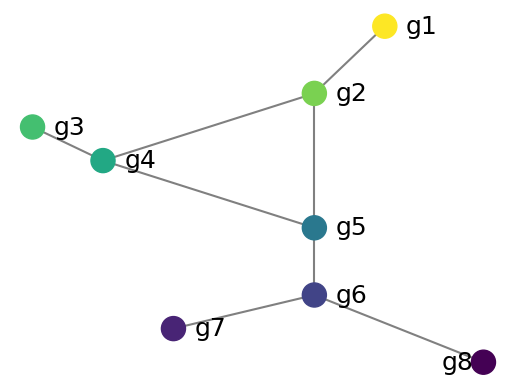

In [4]:
import cereeberus
import networkx as nx
import matplotlib.pyplot as plt

# Create the graph
G = cereeberus.ReebGraph()

# Add nodes with filtration values
G.add_node('g1', f_vertex=24)
G.add_node('g2', f_vertex=20)
G.add_node('g3', f_vertex=18)
G.add_node('g4', f_vertex=16)
G.add_node('g5', f_vertex=12)
G.add_node('g6', f_vertex=8)
G.add_node('g7', f_vertex=6)
G.add_node('g8', f_vertex=4)

# Add edges
G.add_edge('g1', 'g2')
G.add_edge('g2', 'g4')
G.add_edge('g4', 'g3')
G.add_edge('g2', 'g5')
G.add_edge('g4', 'g5')
G.add_edge('g5', 'g6')
G.add_edge('g6', 'g7')
G.add_edge('g6', 'g8')

# Set the node positions
G.pos_f = {
    'g1': (0.2, 24),
    'g2': (0.15, 20),
    'g3': (-0.05, 18),
    'g4': (0, 16),
    'g5': (0.15, 12),
    'g6': (0.15, 8),
    'g7': (0.05, 6),
    'g8': (0.27, 4),
}

# Define custom label positions
label_positions = {
    'g1': (0.25-0.035, 24),  # Slightly right of node g1
    'g2': (0.2-0.035, 20),   # Slightly right of node g2
    'g3': (0.0-0.035, 18),   # Slightly right of node g3
    'g4': (0.05-0.035, 16),  # Slightly right of node g4
    'g5': (0.2-0.035, 12),   # Slightly right of node g5
    'g6': (0.2-0.035, 8),    # Slightly right of node g6
    'g7': (0.1-0.035, 6),    # Slightly right of node g7
    'g8': (0.32-0.08, 4),   # Slightly right of node g8
}

# Draw the graph with the given positions
G.draw(cpx=1, with_labels=False)

# Add labels using the custom label positions
for node, (x, y) in label_positions.items():
    plt.text(
        x, y,            # Use the custom label position
        node,            # Label text
        fontsize=18,
        ha='left',       # Horizontal alignment
        va='center'      # Vertical alignment
    )
plt.axis('off')
# Add a title or text to the graph
# plt.text(
#     0.65, 0.95,                # Position (adjust based on your graph layout)
#     r"Reeb graph: $R_g$",      # Text content (LaTeX-style math)
#     fontsize=22,               # Font size
#     horizontalalignment='right',  # Align the text to the right
#     verticalalignment='top',      # Align the text to the top
#     transform=plt.gca().transAxes  # Relative to the axes
# )

# Show the plot
# plt.show()

# Save the plot
plt.savefig('./torus.jpg', bbox_inches='tight')
# plt.savefig('./torus.eps', format='eps', bbox_inches='tight')


Three steps to calculate Gromov-Wasserstein disntance between $R_f$ and $R_g$:

Step 1: Compute the Smoothed Symmetric Reeb Radius.

Step 2: Compute the Persistence Diagram-Based Borel Probability

Step 3: Identify the Optimal Transport Plan and cal-
culate $GW_p$

##Step 1: Compute the Smoothed Symmetric Reeb Radius.

In [5]:
# # Use nx.Graph() for undirected graphs
# F = nx.Graph()
# F.add_node('f1', f_vertex=24)
# F.add_node('f2', f_vertex=18)
# F.add_node('f3', f_vertex=20)
# F.add_node('f4', f_vertex=12)
# F.add_node('f5', f_vertex=15)
# F.add_node('f6', f_vertex=6)
# F.add_node('f7', f_vertex=8)
# F.add_node('f8', f_vertex=2)

# F.add_edge('f1', 'f2')
# F.add_edge('f2', 'f4')
# F.add_edge('f2', 'f5')
# F.add_edge('f3', 'f5')
# F.add_edge('f5', 'f7')
# F.add_edge('f4', 'f6')
# F.add_edge('f4', 'f7')
# F.add_edge('f7', 'f8')



# G = nx.Graph()
# G.add_node('g1', f_vertex=24)
# G.add_node('g2', f_vertex=20)
# G.add_node('g3', f_vertex=18)
# G.add_node('g4', f_vertex=16)
# G.add_node('g5', f_vertex=12)
# G.add_node('g6', f_vertex=8)
# G.add_node('g7', f_vertex=6)
# G.add_node('g8', f_vertex=4)

# G.add_edge('g1', 'g2')
# G.add_edge('g2', 'g4')
# G.add_edge('g4', 'g3')
# G.add_edge('g2', 'g5')
# G.add_edge('g4', 'g5')
# G.add_edge('g5', 'g6')
# G.add_edge('g6', 'g7')
# G.add_edge('g6', 'g8')

# Define Graph F
F = nx.Graph()
F_f_values = {'f1': 24, 'f2': 18, 'f3': 20, 'f4': 12, 'f5': 15, 'f6': 6, 'f7': 8, 'f8': 2}
for node, f_val in F_f_values.items():
    F.add_node(node, f_vertex=f_val)
F_edges = [('f1', 'f2'), ('f2', 'f4'), ('f2', 'f5'), ('f3', 'f5'),
           ('f5', 'f7'), ('f4', 'f6'), ('f4', 'f7'), ('f7', 'f8')]
F.add_edges_from(F_edges)

# Define Graph G
G = nx.Graph()
G_f_values = {'g1': 24, 'g2': 20, 'g3': 18, 'g4': 16, 'g5': 12, 'g6': 8, 'g7': 6, 'g8': 4}
for node, f_val in G_f_values.items():
    G.add_node(node, f_vertex=f_val)
G_edges = [('g1', 'g2'), ('g2', 'g4'), ('g4', 'g3'), ('g2', 'g5'),
           ('g4', 'g5'), ('g5', 'g6'), ('g6', 'g7'), ('g6', 'g8')]
G.add_edges_from(G_edges)

In [6]:
## The Reeb Radius algorithm is based on the algorithm 1 from
## Justin's paper: Stability and Approximations for Decorated Reeb Spaces

import heapq
import math
import networkx as nx # Assuming networkx is used as in the prompt

def calculate_asymmetric_reeb_radius(graph, g_values, start_node):
    """
    Calculates the asymmetric Reeb radius rho_f(start_node, v) for all nodes v.
    Based on Algorithm 1 from Curry et al. (arXiv:2312.01982v2).

    Args:
      graph: A networkx graph.
      g_values: A dictionary mapping each node to its scalar value f(node).
      start_node: The node x from which to calculate the Reeb radius.

    Returns:
      A dictionary mapping each node v to its asymmetric Reeb radius rho_f(start_node, v).
    """
    reeb_radii = {node: math.inf for node in graph.nodes()}
    reeb_radii[start_node] = 0

    # Priority queue stores tuples: (current_reeb_radius, node)
    priority_queue = [(0, start_node)]

    start_node_value = g_values[start_node]

    while priority_queue:
        current_radius, current_node = heapq.heappop(priority_queue)

        # Optimization: If we found a shorter path already, skip
        # This handles cases where a node might be pushed multiple times
        # before being processed with its final minimum radius.
        if current_radius > reeb_radii[current_node]:
            continue

        for neighbor in graph.neighbors(current_node):
            # Calculate distance in metric space (absolute difference for R)
            # between g(start_node) and g(neighbor)
            dist_start_neighbor = abs(start_node_value - g_values[neighbor])

            # Calculate potential new Reeb radius via current_node
            potential_radius = max(reeb_radii[current_node], dist_start_neighbor)

            # Update ONLY if the neighbor hasn't had its final value set yet
            # (i.e., its value is still infinity), OR if we found a path
            # that has a smaller *maximum deviation*. The standard Dijkstra
            # update (potential_radius < reeb_radii[neighbor]) finds the
            # minimum overall cost path. Here we need the minimum *bottleneck* path.
            # Algorithm 1 in the paper updates only if rho_g(x,w) == infinity.
            # A standard Dijkstra implementation usually checks '<'.
            # Let's stick to the paper's logic for direct implementation:
            # A node's value is set once when it's popped from the queue.
            # We only update neighbors whose values are currently infinity.

            if reeb_radii[neighbor] == math.inf:
                 # Update the radius tentative value
                 reeb_radii[neighbor] = potential_radius
                 heapq.heappush(priority_queue, (potential_radius, neighbor))
            # NOTE: If a node is already in the queue with a higher tentative value,
            # this logic won't update it. However, the Dijkstra property ensures
            # that the first time a node is *popped* from the queue, its radius is final.
            # The check `if current_radius > reeb_radii[current_node]: continue`
            # handles the redundant entries in the queue.

    return reeb_radii

def calculate_symmetric_reeb_radius_matrix(graph, g_values):
    """
    Calculates the full matrix of Symmetric Reeb Radius distances d(u, v)
    for all pairs of nodes (u, v) in the graph.

    Args:
      graph: A networkx graph.
      g_values: A dictionary mapping each node to its scalar value f(node).

    Returns:
      A dictionary of dictionaries representing the symmetric distance matrix.
      matrix[u][v] gives the distance d(u, v).
    """
    nodes = list(graph.nodes())
    num_nodes = len(nodes)
    asymmetric_radii = {}

    # Calculate all asymmetric radii first
    for node in nodes:
        asymmetric_radii[node] = calculate_asymmetric_reeb_radius(graph, g_values, node)

    symmetric_matrix = {u: {v: 0.0 for v in nodes} for u in nodes}

    for i in range(num_nodes):
        for j in range(i, num_nodes): # Iterate through upper triangle including diagonal
            u = nodes[i]
            v = nodes[j]

            rho_uv = asymmetric_radii[u][v]
            rho_vu = asymmetric_radii[v][u]

            # Handle potential infinities if graph is disconnected (shouldn't be here)
            if rho_uv == math.inf or rho_vu == math.inf:
                 symmetric_dist = math.inf
            else:
                 symmetric_dist = 0.5 * (rho_uv + rho_vu)

            symmetric_matrix[u][v] = symmetric_dist
            symmetric_matrix[v][u] = symmetric_dist # Ensure symmetry

    return symmetric_matrix




In [7]:
# --- UPDATED print_matrix function ---
def print_matrix(matrix, title):
    """Prints a matrix (dict of dicts) with aligned columns."""
    print(f"\n--- {title} ---")
    if not matrix:
        print("(Matrix is empty)")
        return

    nodes = sorted(matrix.keys()) # Sort nodes for consistent order
    if not nodes:
        print("(Matrix has no nodes)")
        return

    # Determine column widths
    col_widths = {}
    for v in nodes: # Iterate through columns
        # Width needed for header
        max_width = len(str(v))
        # Width needed for values in this column
        for u in nodes: # Iterate through rows
            # Format value to desired precision first
            formatted_val = f"{matrix[u][v]:.1f}"
            max_width = max(max_width, len(formatted_val))
        col_widths[v] = max_width

    # Determine width for row labels (first column)
    row_label_width = max(len(str(u)) for u in nodes)

    # Print header
    header = f"{' ' * row_label_width} |" # Space for row labels
    for v in nodes:
        header += f" {str(v):>{col_widths[v]}}" # Right-align header in its column width
    print(header)

    # Print separator
    separator = "-" * (row_label_width + 1) + "+" + "-" * (len(header) - row_label_width - 1)
    print(separator)

    # Print rows
    for u in nodes:
        row_str = f"{str(u):>{row_label_width}} |" # Right-align row label
        for v in nodes:
            formatted_val = f"{matrix[u][v]:.1f}"
            row_str += f" {formatted_val:>{col_widths[v]}}" # Right-align value in its column width
        print(row_str)

In [8]:
# Calculate for Graph F
symmetric_matrix_F = calculate_symmetric_reeb_radius_matrix(F, F_f_values)

# Calculate for Graph G
symmetric_matrix_G = calculate_symmetric_reeb_radius_matrix(G, G_f_values)

# Display results with the updated function
print_matrix(symmetric_matrix_F, "Symmetric Reeb Radius Matrix for Graph F")
print_matrix(symmetric_matrix_G, "Symmetric Reeb Radius Matrix for Graph G")


--- Symmetric Reeb Radius Matrix for Graph F ---
   |   f1   f2   f3   f4   f5   f6   f7   f8
---+-----------------------------------------
f1 |  0.0  6.0  7.0 12.0  9.0 18.0 16.0 22.0
f2 |  6.0  0.0  4.0  6.0  3.0 12.0 10.0 16.0
f3 |  7.0  4.0  0.0  8.0  5.0 14.0 12.0 18.0
f4 | 12.0  6.0  8.0  0.0  3.5  6.0  4.0 10.0
f5 |  9.0  3.0  5.0  3.5  0.0  9.0  7.0 13.0
f6 | 18.0 12.0 14.0  6.0  9.0  0.0  5.0  8.0
f7 | 16.0 10.0 12.0  4.0  7.0  5.0  0.0  6.0
f8 | 22.0 16.0 18.0 10.0 13.0  8.0  6.0  0.0

--- Symmetric Reeb Radius Matrix for Graph G ---
   |   g1   g2   g3   g4   g5   g6   g7   g8
---+-----------------------------------------
g1 |  0.0  4.0  7.0  8.0 12.0 16.0 18.0 20.0
g2 |  4.0  0.0  3.0  4.0  8.0 12.0 14.0 16.0
g3 |  7.0  3.0  0.0  2.0  6.0 10.0 12.0 14.0
g4 |  8.0  4.0  2.0  0.0  4.0  8.0 10.0 12.0
g5 | 12.0  8.0  6.0  4.0  0.0  4.0  6.0  8.0
g6 | 16.0 12.0 10.0  8.0  4.0  0.0  2.0  4.0
g7 | 18.0 14.0 12.0 10.0  6.0  2.0  0.0  3.0
g8 | 20.0 16.0 14.0 12.0  8.0  4.0  3.0  0.

## Step 2: Compute the Persistence Diagram-Based Borel Probability

In [9]:
import networkx as nx
import gudhi as gd
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import warnings

# Suppress specific Gudhi warnings if desired
warnings.filterwarnings("ignore", category=UserWarning, module='gudhi')

def calculate_pi_measure_heuristic_mapping(graph, nx_res=500, ny_res=500, sigma=3, weight_power=1.0, plot_pd=False, plot_pi=False, tolerance=1e-5):
    """
    Calculates Persistence Image based probability measure from a NetworkX graph.
    Uses HEURISTIC node mapping. Plots PD with different markers per type if plot_pd=True.
    # ... (rest of docstring same as before) ...
    """

    print("Starting PI Measure calculation (using heuristic node mapping)...")

    # == Part 1: Calculate Extended Persistence using Gudhi ==
    print("Step 1: Calculating Extended Persistence with Gudhi...")
    node_f_values = nx.get_node_attributes(graph, 'f_vertex')
    if not node_f_values: print("Error: Nodes must have 'f_vertex' attribute."); return None

    # --- (Simplex tree creation remains the same) ---
    node_list = list(graph.nodes())
    node_mapping = {node: idx for idx, node in enumerate(node_list)}
    inverse_node_mapping = {idx: node for node, idx in node_mapping.items()}
    st = gd.SimplexTree()
    node_f_values_mapped = {}
    for node, idx in node_mapping.items(): f_val = node_f_values[node]; st.insert([idx], filtration=f_val); node_f_values_mapped[idx] = f_val
    for u, v in graph.edges(): idx_u, idx_v = node_mapping[u], node_mapping[v]; f_u, f_v = node_f_values_mapped[idx_u], node_f_values_mapped[idx_v]; st.insert([idx_u, idx_v], filtration=max(f_u, f_v))

    # Store pairs by type for plotting, and all finite pairs for PI calc
    pairs_by_type = {"Ordinary": [], "Relative": [], "Extended+": [], "Extended-": []}
    all_finite_pairs_bd = [] # Still needed for PI and mapping

    print("\n--- Raw Gudhi Extended Persistence Output ---")
    try:
        _ = st.make_filtration_non_decreasing(); st.extend_filtration()
        extended_persistence_dgms = st.extended_persistence()
        diagram_types = ["Ordinary", "Relative", "Extended+", "Extended-"]

        if len(extended_persistence_dgms) == len(diagram_types):
             for i, dgm_list in enumerate(extended_persistence_dgms):
                 dgm_type = diagram_types[i]
                 print(f"  Diagram Type: {dgm_type}")
                 if not dgm_list: print("    (empty)"); continue
                 for dim, (birth, death) in dgm_list:
                     birth_str = f"{birth:.3f}" if birth != np.inf else "inf"
                     death_str = f"{death:.3f}" if death != np.inf else "inf"
                     print(f"    Dim {dim}: (Birth={birth_str}, Death={death_str})")
                     # Collect finite pairs for PI calc AND for typed plotting
                     if birth != np.inf and death != np.inf and birth != death:
                         pair = (birth, death)
                         all_finite_pairs_bd.append(pair)
                         if dgm_type in pairs_by_type:
                             pairs_by_type[dgm_type].append(pair)
        else: print("  Warning: Unexpected Gudhi output format."); return None
        print("-------------------------------------------\n")
        print(f"  Collected {len(all_finite_pairs_bd)} total finite pairs for PI.")
        if not all_finite_pairs_bd:
            # ... (Handling for no finite pairs remains the same) ...
             return {'probability_measure': {node: 1.0/len(graph.nodes()) if graph.nodes() else 0 for node in graph.nodes()},
                    'heuristic_mapping': {}, 'persistence_image': np.zeros(nx_res * ny_res),
                    'grid_centers': None, 'birth_range': None, 'persistence_range': None,
                    'finite_pairs_bp': [], 'raw_finite_pairs_bd': [],
                    'message': "No finite persistence pairs found. Returning uniform probability."}
    except Exception as e: print(f"Error during Gudhi calc: {e}"); return None

    # Optional Plotting: Persistence Diagram (Modified for different markers)
    if plot_pd:
        print("  Plotting Persistence Diagram (markers by type)...")
        plt.figure(figsize=(7, 7)) # Adjusted size slightly
        markers = {'Ordinary': 'o', 'Relative': 's', 'Extended+': '^', 'Extended-': 'x'}
        colors = {'Ordinary': 'blue', 'Relative': 'red', 'Extended+': 'green', 'Extended-': 'purple'}
        plotted_types = []

        min_val_plot, max_val_plot = np.inf, -np.inf

        # Plot each type with its marker and color
        for dgm_type, pairs in pairs_by_type.items():
            if pairs:
                pairs_np = np.array(pairs)
                plt.scatter(pairs_np[:, 0], pairs_np[:, 1],
                            label=f'{dgm_type} (n={len(pairs)})',
                            marker=markers.get(dgm_type, 'o'), # Default marker 'o'
                            color=colors.get(dgm_type, 'black'), # Default color black
                            alpha=0.8, s=60) # Increased size slightly
                plotted_types.append(dgm_type)
                # Update plot range based on plotted points
                min_val_plot = min(min_val_plot, np.min(pairs_np))
                max_val_plot = max(max_val_plot, np.max(pairs_np))

        if not plotted_types:
            print("  No finite pairs to plot for PD.")
        else:
            # Add diagonal line and finalize plot
            buffer = abs(max_val_plot - min_val_plot) * 0.05 + 1e-5
            plot_range = [min_val_plot - buffer, max_val_plot + buffer]
            # Adjust diag line calculation in case min/max of birth/death differ significantly
            min_coord = np.min(np.array(all_finite_pairs_bd))
            max_coord = np.max(np.array(all_finite_pairs_bd))
            diag_line = np.linspace(max(plot_range[0], min_coord), min(plot_range[1], max_coord), 10)

            plt.plot(diag_line, diag_line, 'k--', label='Diagonal (y=x)')
            plt.xlabel("Birth")
            plt.ylabel("Death")
            plt.title("Extended Persistence Pairs by Type")
            plt.legend()
            plt.xlim(plot_range)
            plt.ylim(plot_range)
            plt.gca().set_aspect('equal', adjustable='box')
            plt.grid(True)
            plt.show()


    # == Part 1.5: Heuristic Node Mapping ==
    # --- (Remains the same - uses all_finite_pairs_bd) ---
    print("\nStep 1.5: Performing Heuristic Node Mapping...")
    heuristic_mapping = {}
    vertex_to_bp_map = {}
    value_to_nodes = {}
    for node, f_val in node_f_values.items(): value_to_nodes.setdefault(f_val, []).append(node)
    possible_f_values = np.array(list(value_to_nodes.keys()))
    mapping_warnings = 0
    for b, d in all_finite_pairs_bd: # Use the combined list here
        birth_match_indices = np.where(np.isclose(possible_f_values, b, atol=tolerance))[0]
        birth_nodes = [node for idx in birth_match_indices for node in value_to_nodes[possible_f_values[idx]]]
        death_match_indices = np.where(np.isclose(possible_f_values, d, atol=tolerance))[0]
        death_nodes = [node for idx in death_match_indices for node in value_to_nodes[possible_f_values[idx]]]
        heuristic_mapping[(b, d)] = (birth_nodes, death_nodes)
        print(f"  Pair ({b:.3f}, {d:.3f}): Matched BirthNodes={birth_nodes}, DeathNodes={death_nodes}")
        if not birth_nodes or not death_nodes: print(f"    Warning: No match found for b ({b:.3f}) or d ({d:.3f})."); mapping_warnings += 1
        if len(birth_nodes) > 1 or len(death_nodes) > 1: print(f"    Warning: Ambiguous match for b ({b:.3f}) or d ({d:.3f})."); mapping_warnings += 1
        p = abs(d - b); point_bp = (b, p)
        for node in birth_nodes + death_nodes:
             if node in vertex_to_bp_map and vertex_to_bp_map[node] != point_bp:
                 print(f"    Warning: Node {node} re-mapped: {vertex_to_bp_map[node]} -> {point_bp}."); mapping_warnings += 1
             vertex_to_bp_map[node] = point_bp
    if mapping_warnings > 0: print("  Heuristic mapping completed with warnings.")
    else: print("  Heuristic mapping completed.")


    # == Part 2: Calculate Persistence Image ==
    # --- (Remains the same - uses all_finite_pairs_bd) ---
    print("\nStep 2: Calculating Persistence Image...")
    finite_pairs_bp = [(b, abs(d - b)) for b, d in all_finite_pairs_bd] # Use combined list
    weights = [p**weight_power for b, p in finite_pairs_bp]
    # Define grid
    min_b = min(p[0] for p in finite_pairs_bp); max_b = max(p[0] for p in finite_pairs_bp)
    min_p = min(p[1] for p in finite_pairs_bp); max_p = max(p[1] for p in finite_pairs_bp)
    buffer_b = 3 * sigma + (max_b - min_b) * 0.05; buffer_p = 3 * sigma + (max_p - min_p) * 0.05
    birth_range = np.linspace(min_b - buffer_b, max_b + buffer_b, nx_res)
    pers_range = np.linspace(max(0, min_p - buffer_p), max_p + buffer_p, ny_res)
    X, Y = np.meshgrid(birth_range, pers_range); grid_centers = np.array([X.ravel(), Y.ravel()]).T
    # Compute PI
    I_f = np.zeros(nx_res * ny_res)
    print(f"  Generating PI using {len(finite_pairs_bp)} points and sigma={sigma}...")
    for point, weight in zip(finite_pairs_bp, weights): gauss = multivariate_normal(mean=point, cov=sigma**2 * np.eye(2)); I_f += weight * gauss.pdf(grid_centers)
    print("  Persistence Image calculated.")

    # --- (Optional PI Plotting remains the same) ---
    if plot_pi:
         # ... (PI plotting code from previous version) ...
         print("  Plotting Persistence Image...")
         try:
             I_f_2d = I_f.reshape(ny_res, nx_res) # Note reshape order (ny, nx) for imshow
             plt.figure(figsize=(7, 6))
             plt.imshow(I_f_2d, origin='lower', extent=[birth_range[0], birth_range[-1], pers_range[0], pers_range[-1]], cmap='viridis', aspect='auto')
             plt.colorbar(label='Weighted Density')
             used_bp_points = np.array(finite_pairs_bp) # Use the same points for scatter plot
             if used_bp_points.shape[0] > 0: plt.scatter(used_bp_points[:, 0], used_bp_points[:, 1], c='red', s=20, label='(Birth, Persistence) points used in PI')
             plt.xlabel('Birth'); plt.ylabel('Persistence'); plt.title('Persistence Image'); plt.legend(); plt.show()
         except Exception as pi_plot_e: print(f"Warning: Could not plot PI. Error: {pi_plot_e}")


    # == Part 3: Contribution Calculation & Normalization ==
    # --- (Remains the same - uses vertex_to_bp_map) ---
    print("\nStep 3: Calculating Contributions & Normalizing...")
    contributions = {}
    if not vertex_to_bp_map: print("  Warning: No vertices mapped. Assigning uniform probability."); num_nodes = len(graph.nodes()); probability_measure = {node: 1.0/num_nodes if num_nodes > 0 else 0 for node in graph.nodes()}
    else:
         print(f"  Calculating contributions for {len(vertex_to_bp_map)} mapped vertices...")
         for node_id, point_bp in vertex_to_bp_map.items(): b_v, p_v = point_bp; gauss_v = multivariate_normal(mean=[b_v, p_v], cov=sigma**2 * np.eye(2)); contributions[node_id] = np.sum(I_f * gauss_v.pdf(grid_centers))
         for node_id in graph.nodes():
             if node_id not in contributions: contributions[node_id] = 0.0; print(f"  Assigning zero contribution to unmapped node {node_id}.")
         total_contribution = sum(contributions.values()); print(f"  Total contribution Z_f: {total_contribution:.6f}")
         if total_contribution > 1e-9: probability_measure = {node: c / total_contribution for node, c in contributions.items()}; print("  Normalization successful.")
         else: print("  Warning: Total contribution near zero. Assigning uniform probability."); num_nodes = len(graph.nodes()); probability_measure = {node: 1.0/num_nodes if num_nodes > 0 else 0 for node in graph.nodes()}

    message = ("Calculation complete. Probability measure generated using HEURISTIC node mapping. "
               "Verify mapping warnings and results, especially if f_values are non-unique.")
    print(f"\n{message}")

    result = {
        'probability_measure': probability_measure,
        'heuristic_mapping': heuristic_mapping,
        'persistence_image': I_f,
        'grid_centers': grid_centers,
        'birth_range': birth_range,
        'persistence_range': pers_range,
        'finite_pairs_bp': finite_pairs_bp,
        # Removed raw_finite_pairs_bd as it's implicitly stored in pairs_by_type for plotting now
        'message': message
    }
    print("\nFinished.")
    return result

Starting PI Measure calculation (using heuristic node mapping)...
Step 1: Calculating Extended Persistence with Gudhi...

--- Raw Gudhi Extended Persistence Output ---
  Diagram Type: Ordinary
    Dim 0: (Birth=6.000, Death=12.000)
  Diagram Type: Relative
    Dim 1: (Birth=20.000, Death=15.000)
  Diagram Type: Extended+
    Dim 0: (Birth=2.000, Death=24.000)
  Diagram Type: Extended-
    Dim 1: (Birth=18.000, Death=8.000)
-------------------------------------------

  Collected 4 total finite pairs for PI.
  Plotting Persistence Diagram (markers by type)...


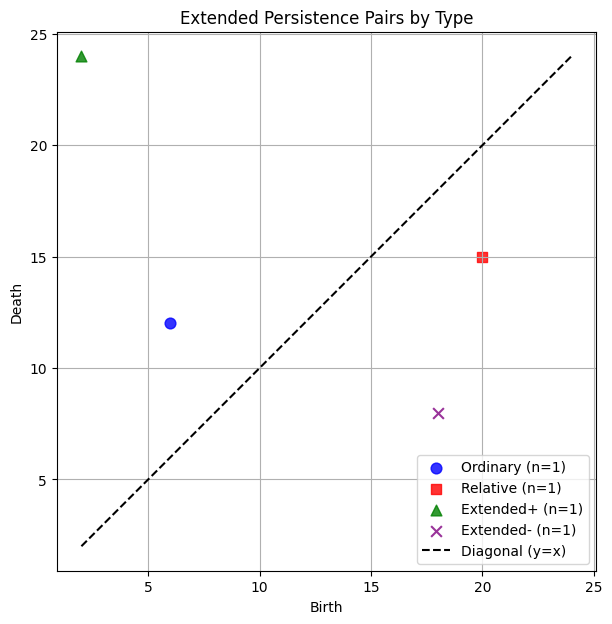


Step 1.5: Performing Heuristic Node Mapping...
  Pair (6.000, 12.000): Matched BirthNodes=['f6'], DeathNodes=['f4']
  Pair (20.000, 15.000): Matched BirthNodes=['f3'], DeathNodes=['f5']
  Pair (2.000, 24.000): Matched BirthNodes=['f8'], DeathNodes=['f1']
  Pair (18.000, 8.000): Matched BirthNodes=['f2'], DeathNodes=['f7']
  Heuristic mapping completed.

Step 2: Calculating Persistence Image...
  Generating PI using 4 points and sigma=2...
  Persistence Image calculated.
  Plotting Persistence Image...


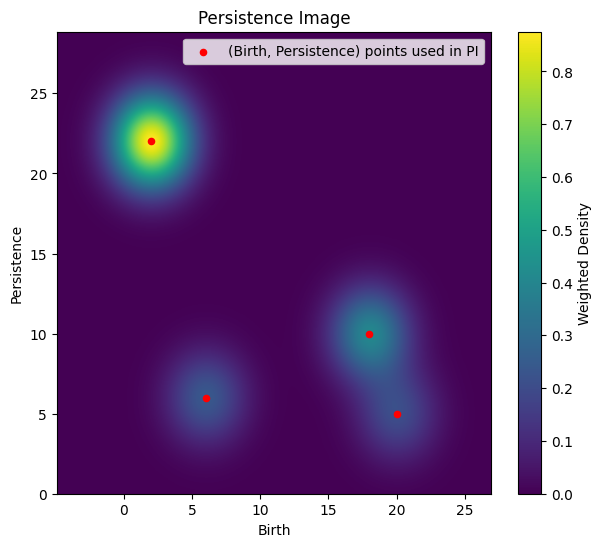


Step 3: Calculating Contributions & Normalizing...
  Calculating contributions for 8 mapped vertices...
  Total contribution Z_f: 490.803001
  Normalization successful.

Calculation complete. Probability measure generated using HEURISTIC node mapping. Verify mapping warnings and results, especially if f_values are non-unique.

Finished.

--- Final Probability Measure (nu_Rf) ---
  Node f1: 0.242032
  Node f2: 0.118998
  Node f3: 0.072957
  Node f4: 0.066013
  Node f5: 0.072957
  Node f6: 0.066013
  Node f7: 0.118998
  Node f8: 0.242032
-------------------------------------------


In [10]:
# Run the calculation on F
final_results_F = calculate_pi_measure_heuristic_mapping(F, sigma=2, plot_pd=True, plot_pi=True)

# Print the final probability measure
if final_results_F and 'probability_measure' in final_results_F:
    print("\n--- Final Probability Measure (nu_Rf) ---")
    prob_measure_F = final_results_F['probability_measure']
    for node_id in sorted(prob_measure_F.keys()): print(f"  Node {node_id}: {prob_measure_F[node_id]:.6f}")
    print("-------------------------------------------")

Starting PI Measure calculation (using heuristic node mapping)...
Step 1: Calculating Extended Persistence with Gudhi...

--- Raw Gudhi Extended Persistence Output ---
  Diagram Type: Ordinary
    Dim 0: (Birth=6.000, Death=8.000)
  Diagram Type: Relative
    Dim 1: (Birth=18.000, Death=16.000)
  Diagram Type: Extended+
    Dim 0: (Birth=4.000, Death=24.000)
  Diagram Type: Extended-
    Dim 1: (Birth=20.000, Death=12.000)
-------------------------------------------

  Collected 4 total finite pairs for PI.
  Plotting Persistence Diagram (markers by type)...


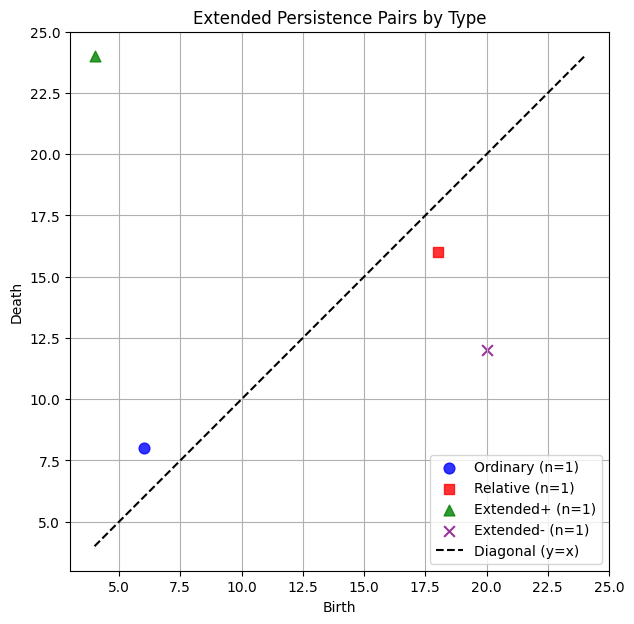


Step 1.5: Performing Heuristic Node Mapping...
  Pair (6.000, 8.000): Matched BirthNodes=['g7'], DeathNodes=['g6']
  Pair (18.000, 16.000): Matched BirthNodes=['g3'], DeathNodes=['g4']
  Pair (4.000, 24.000): Matched BirthNodes=['g8'], DeathNodes=['g1']
  Pair (20.000, 12.000): Matched BirthNodes=['g2'], DeathNodes=['g5']
  Heuristic mapping completed.

Step 2: Calculating Persistence Image...
  Generating PI using 4 points and sigma=2...
  Persistence Image calculated.
  Plotting Persistence Image...


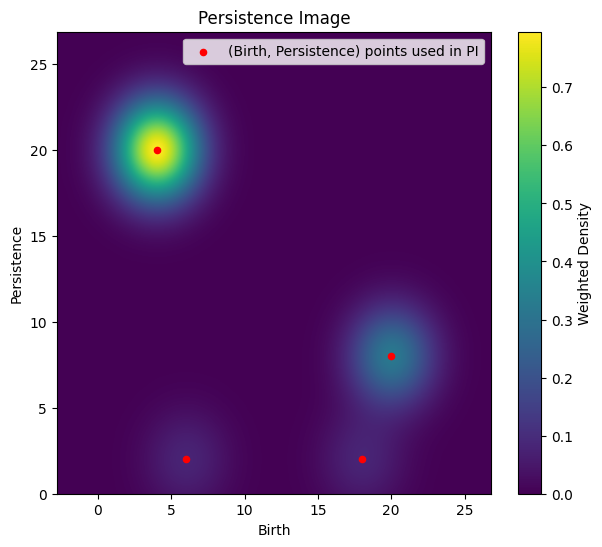


Step 3: Calculating Contributions & Normalizing...
  Calculating contributions for 8 mapped vertices...
  Total contribution Z_f: 404.609384
  Normalization successful.

Calculation complete. Probability measure generated using HEURISTIC node mapping. Verify mapping warnings and results, especially if f_values are non-unique.

Finished.

--- Final Probability Measure (nu_Rg) ---
  Node g1: 0.307525
  Node g2: 0.125534
  Node g3: 0.038518
  Node g4: 0.038518
  Node g5: 0.125534
  Node g6: 0.028423
  Node g7: 0.028423
  Node g8: 0.307525
-------------------------------------------


In [11]:
# Run the calculation on G
final_results_G = calculate_pi_measure_heuristic_mapping(G, sigma=2, plot_pd=True, plot_pi=True)

# Print the final probability measure
if final_results_G and 'probability_measure' in final_results_G:
    print("\n--- Final Probability Measure (nu_Rg) ---")
    prob_measure_G = final_results_G['probability_measure']
    for node_id in sorted(prob_measure_G.keys()): print(f"  Node {node_id}: {prob_measure_G[node_id]:.6f}")
    print("-------------------------------------------")
    # print(f"\nMessage: {final_results_G.get('message', 'N/A')}")

## Step 3: Identify the Optimal Transport Plan and calculate $GW_p$


--- Step 3: GW Calculation, Heatmap Display, and Plotting ---
  Preparing data for POT library...
  Calculating GW distance and transport plan...
--> Calculated GW Distance: 7.814688
  Optimal Transport Plan (pi) shape: (8, 8)

--- Optimal Transport Plan Heatmap ---


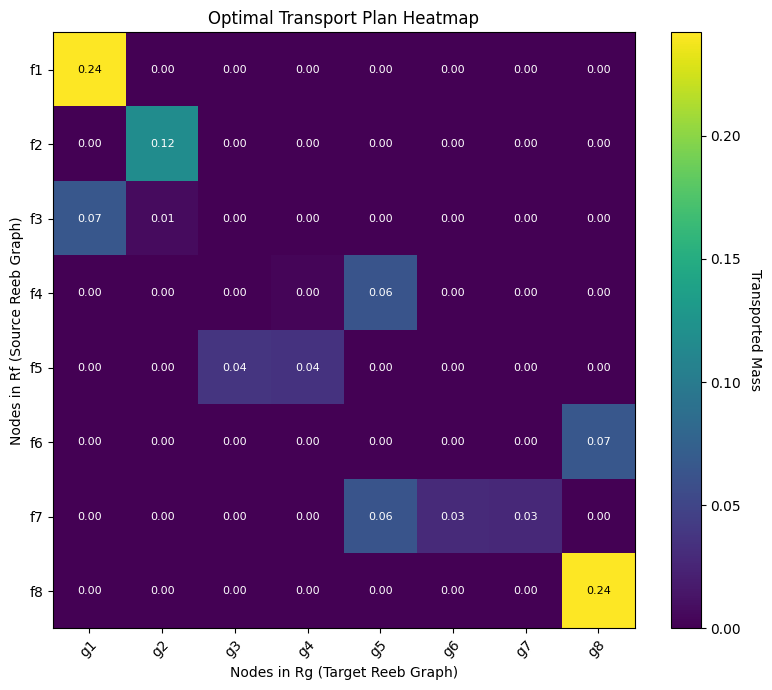


  Generating connection plot...


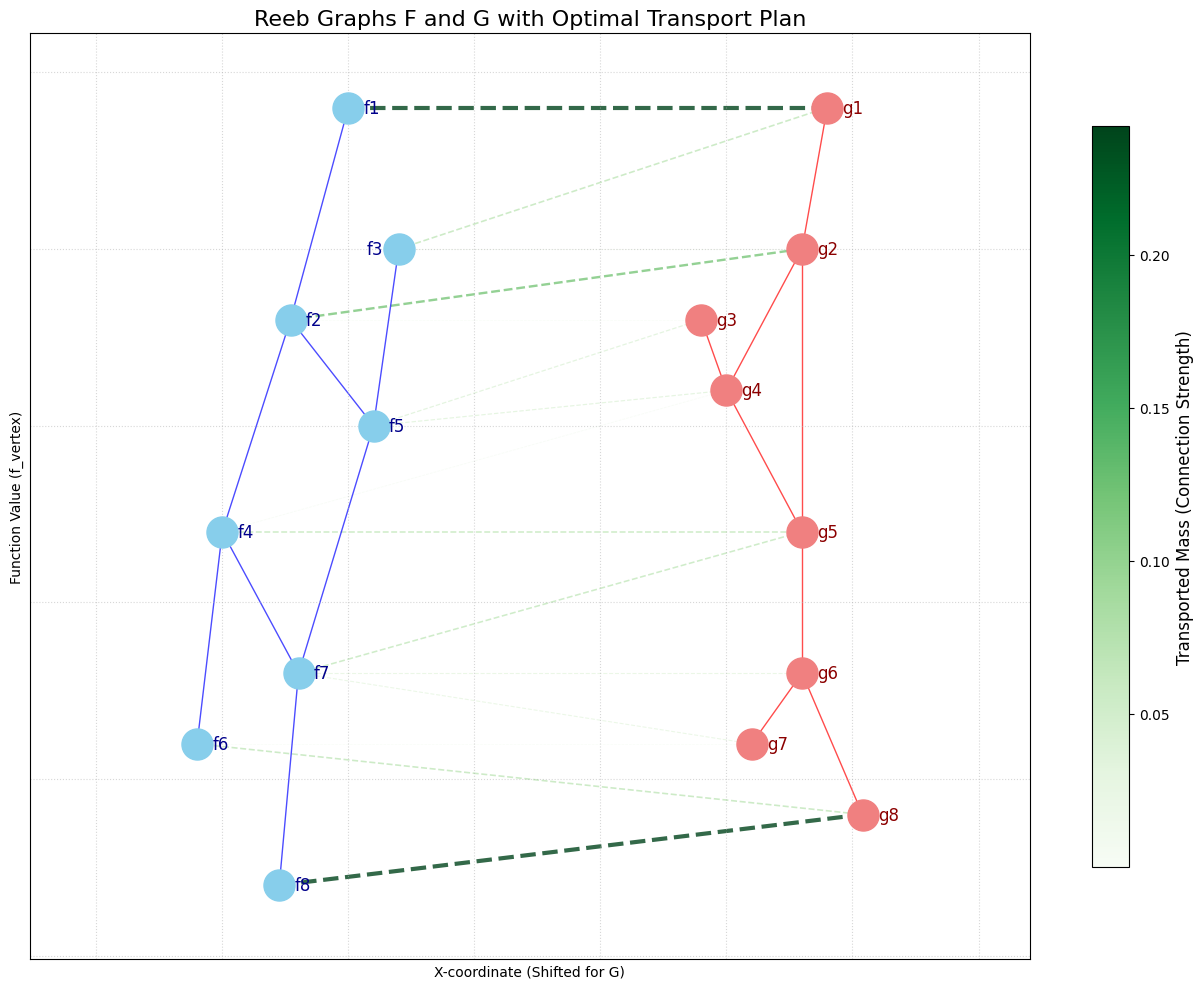


-----------------------------------------------------
Step 3 Finished.
-----------------------------------------------------


In [16]:
# ==============================================================
# Step 3: Identify the Optimal Transport Plan and calculate GW
#         Display Transport Matrix as Heatmap (showing zeros)
#         and Plot the results.
# ==============================================================
import ot
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import numpy as np # Ensure numpy is imported if not already
import math # For checking infinity

print("\n--- Step 3: GW Calculation, Heatmap Display, and Plotting ---")

# Check if prerequisite variables exist
required_vars = ['F', 'G', 'symmetric_matrix_F', 'symmetric_matrix_G', 'prob_measure_F', 'prob_measure_G']
if not all(var in locals() or var in globals() for var in required_vars):
    print("Error: Prerequisite variables (graphs, matrices, probabilities) not found.")
    print("Please ensure Steps 1 and 2 have run successfully.")
    # Optional: Add dummy data here for testing plotting if needed
    # exit() # Or handle error appropriately
else:
    # --- 3A: Prepare Data for POT ---
    print("  Preparing data for POT library...")

    # Get sorted node lists
    nodes_F = sorted(list(F.nodes()))
    nodes_G = sorted(list(G.nodes()))
    n_F = len(nodes_F)
    n_G = len(nodes_G)

    # Convert distance matrices (dict of dicts) to NumPy arrays C1, C2
    C1 = np.zeros((n_F, n_F), dtype=np.float64)
    for i, u in enumerate(nodes_F):
        for j, v in enumerate(nodes_F):
            dist = symmetric_matrix_F.get(u, {}).get(v, np.inf)
            C1[i, j] = dist if np.isfinite(dist) else np.inf

    C2 = np.zeros((n_G, n_G), dtype=np.float64)
    for i, u in enumerate(nodes_G):
        for j, v in enumerate(nodes_G):
            dist = symmetric_matrix_G.get(u, {}).get(v, np.inf)
            C2[i, j] = dist if np.isfinite(dist) else np.inf

    # Convert probability measures (dicts) to NumPy arrays p, q
    p = np.array([prob_measure_F.get(node, 0.0) for node in nodes_F], dtype=np.float64)
    q = np.array([prob_measure_G.get(node, 0.0) for node in nodes_G], dtype=np.float64)

    # Normalize probabilities
    if n_F > 0:
        p_sum = p.sum()
        if not np.isclose(p_sum, 1.0):
            print(f"  Normalizing p (sum was {p_sum:.4f})")
            if p_sum > 1e-9: p = p / p_sum
            else: p.fill(1.0 / n_F)
    if n_G > 0:
        q_sum = q.sum()
        if not np.isclose(q_sum, 1.0):
            print(f"  Normalizing q (sum was {q_sum:.4f})")
            if q_sum > 1e-9: q = q / q_sum
            else: q.fill(1.0 / n_G)

    # Replace Inf/NaN in C1, C2
    if np.any(~np.isfinite(C1)) or np.any(~np.isfinite(C2)):
         print("  Replacing non-finite values in distance matrices...")
         max_finite_c1 = np.nanmax(C1[np.isfinite(C1)]) if np.any(np.isfinite(C1)) else 0
         max_finite_c2 = np.nanmax(C2[np.isfinite(C2)]) if np.any(np.isfinite(C2)) else 0
         large_val = max(max_finite_c1, max_finite_c2)
         if not np.isfinite(large_val): large_val = 1e12
         large_val = large_val * 10.0 + 1e9
         C1[~np.isfinite(C1)] = large_val
         C2[~np.isfinite(C2)] = large_val

    # --- 3B: Calculate GW Distance and Plan ---
    print("  Calculating GW distance and transport plan...")
    pi = None
    gw_dist = np.inf
    log = {} # Initialize log
    try:
        gw_dist, log = ot.gromov_wasserstein2(
            C1, C2, p, q,
            loss_fun='square_loss',
            log=True, # MUST be True to get 'T'
            verbose=False
            )
        if 'T' in log:
            pi = log['T']
            print(f"--> Calculated GW Distance: {gw_dist:.6f}")
            print(f"  Optimal Transport Plan (pi) shape: {pi.shape}")
        else:
             print(f"--> Calculated GW Distance: {gw_dist:.6f}")
             print("  Warning: Optimal transport plan 'T' not found in POT log.")
             pi = None

    except Exception as e:
        print(f"Error during GW calculation: {e}")
        print("Cannot proceed with plotting or matrix display.")
        pi = None

    # --- Display Transport Matrix as Heatmap ---
    if pi is not None:
        print("\n--- Optimal Transport Plan Heatmap ---")
        fig_hm, ax_hm = plt.subplots(figsize=(8, 7)) # Adjust size as needed

        # Use imshow to display the matrix
        cmap = 'viridis' # Colormap similar to the example
        im = ax_hm.imshow(pi, cmap=cmap, aspect='auto', origin='upper', interpolation='nearest')

        # Add colorbar
        cbar = fig_hm.colorbar(im, ax=ax_hm)
        cbar.set_label('Transported Mass', rotation=270, labelpad=15)

        # Set ticks and labels
        ax_hm.set_xticks(np.arange(n_G))
        ax_hm.set_yticks(np.arange(n_F))
        ax_hm.set_xticklabels(nodes_G)
        ax_hm.set_yticklabels(nodes_F)

        # Rotate the tick labels and set their alignment.
        plt.setp(ax_hm.get_xticklabels(), rotation=45, ha="right",
                 rotation_mode="anchor")

        # Loop over data dimensions and create text annotations FOR ALL CELLS.
        threshold = pi.max() / 2. # Threshold for switching text color (white/black)
        for i in range(n_F):
            for j in range(n_G):
                text_color = "white" if pi[i, j] < threshold else "black"
                # Display value in EVERY cell, formatted to 2 decimal places
                # Values very close to zero (e.g., < 0.005) will display as "0.00"
                text = ax_hm.text(j, i, f"{pi[i, j]:.2f}",
                               ha="center", va="center", color=text_color, fontsize=8) # Adjust fontsize if needed

        ax_hm.set_title("Optimal Transport Plan Heatmap")
        ax_hm.set_xlabel("Nodes in Rg (Target Reeb Graph)")
        ax_hm.set_ylabel("Nodes in Rf (Source Reeb Graph)")
        fig_hm.tight_layout()
        plt.show() # Show the heatmap plot


    # --- Plotting Connections ---
    if pi is not None: # Only plot if GW calculation succeeded
        print("\n  Generating connection plot...")

        # Define Node Positions
        pos_F = {
            'f1': (0, 24), 'f2': (-0.1146, 18), 'f3': (0.1, 20), 'f4': (-0.25, 12),
            'f5': (0.05, 15), 'f6': (-0.3, 6), 'f7': (-0.0988, 8), 'f8': (-0.1370, 2)
        }
        pos_G = {
            'g1': (0.2, 24), 'g2': (0.15, 20), 'g3': (-0.05, 18), 'g4': (0, 16),
            'g5': (0.15, 12), 'g6': (0.15, 8), 'g7': (0.05, 6), 'g8': (0.27, 4)
        }

        # Prepare Layout for Combined Plot
        min_x_F=min(p[0] for p in pos_F.values()); max_x_F=max(p[0] for p in pos_F.values())
        min_x_G=min(p[0] for p in pos_G.values()); max_x_G=max(p[0] for p in pos_G.values())
        x_offset = max_x_F - min_x_G + 0.6
        pos_G_shifted = {node: (pos_G[node][0] + x_offset, pos_G[node][1]) for node in nodes_G if node in pos_G}

        # Create the Plot
        fig_conn, ax_conn = plt.subplots(figsize=(13, 10))

        # Draw Graphs
        nx.draw_networkx_nodes(F, pos_F, node_color='skyblue', node_size=500, ax=ax_conn)
        nx.draw_networkx_edges(F, pos_F, edge_color='blue', width=1.0, alpha=0.7, ax=ax_conn)
        label_offset_F = 0.03
        for node, (x, y) in pos_F.items(): ha = 'right' if node == 'f3' else 'left'; x_adj = x - label_offset_F if node == 'f3' else x + label_offset_F; ax_conn.text(x_adj, y, node, fontsize=12, ha=ha, va='center', color='darkblue')

        nx.draw_networkx_nodes(G, pos_G_shifted, node_color='lightcoral', node_size=500, ax=ax_conn)
        nx.draw_networkx_edges(G, pos_G_shifted, edge_color='red', width=1.0, alpha=0.7, ax=ax_conn)
        label_offset_G = 0.03
        for node, (x, y) in pos_G_shifted.items(): ax_conn.text(x + label_offset_G, y, node, fontsize=12, ha='left', va='center', color='darkred')

        # Draw Connections
        segments = []; pi_values_for_lines = []
        min_pi_for_line = 1e-5
        max_pi_val = pi.max()

        if max_pi_val > 1e-9:
            for i in range(n_F):
                for j in range(n_G):
                    val = pi[i, j]
                    if val >= min_pi_for_line:
                        node_f = nodes_F[i]
                        node_g = nodes_G[j]
                        if node_f in pos_F and node_g in pos_G_shifted:
                            segments.append([pos_F[node_f], pos_G_shifted[node_g]])
                            pi_values_for_lines.append(val)
        else:
            print("    Transport plan seems empty or near zero, skipping connection lines.")

        if segments:
            cmap_conn = plt.get_cmap('Greens')
            norm_vmin = max(min_pi_for_line, 1e-9)
            norm_conn = mcolors.Normalize(vmin=norm_vmin, vmax=max_pi_val)
            line_widths = 0.5 + 2.5 * (np.array(pi_values_for_lines) / max_pi_val)

            lc = LineCollection(segments, cmap=cmap_conn, norm=norm_conn, linewidths=line_widths, linestyle='--', zorder=0, alpha=0.8)
            lc.set_array(np.array(pi_values_for_lines))
            ax_conn.add_collection(lc)

            sm = cm.ScalarMappable(cmap=cmap_conn, norm=norm_conn)
            sm.set_array([])
            cb = plt.colorbar(sm, ax=ax_conn, label='Transported Mass (Connection Strength)', shrink=0.8)
            cb.set_label('Transported Mass (Connection Strength)', fontsize=12)
            cb.ax.tick_params(labelsize=10)
        else:
            print("    No significant transport connections to draw.")

        # Final Plot Adjustments
        ax_conn.set_title("Reeb Graphs F and G with Optimal Transport Plan", fontsize=16)
        ax_conn.set_xlabel("X-coordinate (Shifted for G)")
        ax_conn.set_ylabel("Function Value (f_vertex)")
        plotted_pos = list(pos_F.values()) + list(pos_G_shifted.values())
        if plotted_pos:
            all_x = [p[0] for p in plotted_pos]
            all_y = [p[1] for p in plotted_pos]
            x_buffer = (max(all_x) - min(all_x)) * 0.1 + 0.2
            y_buffer = (max(all_y) - min(all_y)) * 0.05 + 1.0
            ax_conn.set_xlim(min(all_x) - x_buffer, max(all_x) + x_buffer)
            ax_conn.set_ylim(min(all_y) - y_buffer, max(all_y) + y_buffer)
        ax_conn.grid(True, linestyle=':', alpha=0.5)
        fig_conn.tight_layout()
        plt.show()

    else:
        print("\nConnection Plotting skipped as transport plan 'pi' is not available.")

print("\n-----------------------------------------------------")
print("Step 3 Finished.")
print("-----------------------------------------------------")